# Sales Analysis with Pandas

In [80]:
import os
import pandas as pd

In [129]:
# load in data

path = 'sales_data/'

frames = []

for file in os.listdir(path):
    
    dataframe = pd.read_csv(path + file)
    
    frames.append(dataframe)
    
    
# make one big dataframe
data = pd.concat(frames)

In [130]:
# drop all rows with nan's in

data = data.dropna()

In [131]:
# drop strange rows with column names as entries

data = data[data['Quantity Ordered'] != 'Quantity Ordered']

In [132]:
# convert string columns to numeric columns

data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])

# make sales column
data['Sales'] = data['Quantity Ordered'] * data['Price Each']

In [133]:
# create new numeric columns

data['Month'] = data['Order Date'].str[0:2]
data['Month'] = pd.to_numeric(data['Month'])

data['Day'] = data['Order Date'].str[3:5]
data['Day'] = pd.to_numeric(data['Day'])

data['Year'] = data['Order Date'].str[6:8]
data['Year'] = pd.to_numeric(data['Year'])

data['Hour'] = data['Order Date'].str[9:11]
data['Hour'] = pd.to_numeric(data['Hour'])

data['Minute'] = data['Order Date'].str[12:]
data['Minute'] = pd.to_numeric(data['Minute'])

# drop the order date column in place
data.drop('Order Date', axis=1, inplace=True)

In [134]:
data

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Sales,Month,Day,Year,Hour,Minute
0,259358,34in Ultrawide Monitor,1,379.99,"609 Cherry St, Dallas, TX 75001",379.99,10,28,19,10,56
1,259359,27in 4K Gaming Monitor,1,389.99,"225 5th St, Los Angeles, CA 90001",389.99,10,28,19,17,26
2,259360,AAA Batteries (4-pack),2,2.99,"967 12th St, New York City, NY 10001",5.98,10,24,19,17,20
3,259361,27in FHD Monitor,1,149.99,"628 Jefferson St, New York City, NY 10001",149.99,10,14,19,22,26
4,259362,Wired Headphones,1,11.99,"534 14th St, Los Angeles, CA 90001",11.99,10,7,19,16,10
...,...,...,...,...,...,...,...,...,...,...,...
14366,236665,Wired Headphones,1,11.99,"694 Meadow St, Atlanta, GA 30301",11.99,7,20,19,16,16
14367,236666,20in Monitor,1,109.99,"866 14th St, San Francisco, CA 94016",109.99,7,31,19,20,11
14368,236667,AAA Batteries (4-pack),1,2.99,"249 Cherry St, Dallas, TX 75001",2.99,7,17,19,22,29
14369,236668,Wired Headphones,1,11.99,"727 Wilson St, Austin, TX 73301",11.99,7,30,19,19,28


In [135]:
# group sales by month and sum

monthly_sales = data['Sales'].groupby(data['Month']).sum()
monthly_sales

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

In [91]:
import matplotlib.pyplot as plt

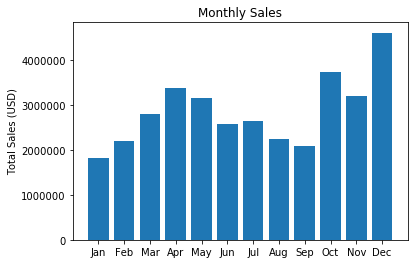

In [136]:
plt.figure()

x = monthly_sales.index
y = monthly_sales.values

plt.bar(x, y)

plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.ylabel('Total Sales (USD)')

plt.title('Monthly Sales')

plt.show()

In [137]:
# group sales by hour and sum

hourly_sales = data['Sales'].groupby(data['Hour']).sum()
hourly_sales

Hour
0      713721.27
1      460866.88
2      234851.44
3      145757.89
4      162661.01
5      230679.82
6      448113.00
7      744854.12
8     1192348.97
9     1639030.58
10    1944286.77
11    2300610.24
12    2316821.34
13    2155389.80
14    2083672.73
15    1941549.60
16    1904601.31
17    2129361.61
18    2219348.30
19    2412938.54
20    2281716.24
21    2042000.86
22    1607549.21
23    1179304.44
Name: Sales, dtype: float64

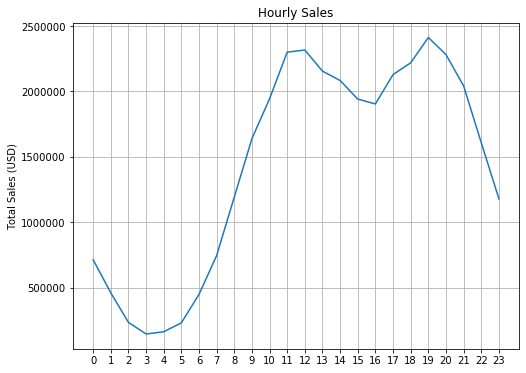

In [138]:
plt.figure(figsize=(8, 6))

x = hourly_sales.index
y = hourly_sales.values

plt.plot(x, y)

plt.ylabel('Total Sales (USD)')

plt.xticks(range(0, 24))

plt.title('Hourly Sales')

plt.grid()

plt.show()

In [139]:
data

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Sales,Month,Day,Year,Hour,Minute
0,259358,34in Ultrawide Monitor,1,379.99,"609 Cherry St, Dallas, TX 75001",379.99,10,28,19,10,56
1,259359,27in 4K Gaming Monitor,1,389.99,"225 5th St, Los Angeles, CA 90001",389.99,10,28,19,17,26
2,259360,AAA Batteries (4-pack),2,2.99,"967 12th St, New York City, NY 10001",5.98,10,24,19,17,20
3,259361,27in FHD Monitor,1,149.99,"628 Jefferson St, New York City, NY 10001",149.99,10,14,19,22,26
4,259362,Wired Headphones,1,11.99,"534 14th St, Los Angeles, CA 90001",11.99,10,7,19,16,10
...,...,...,...,...,...,...,...,...,...,...,...
14366,236665,Wired Headphones,1,11.99,"694 Meadow St, Atlanta, GA 30301",11.99,7,20,19,16,16
14367,236666,20in Monitor,1,109.99,"866 14th St, San Francisco, CA 94016",109.99,7,31,19,20,11
14368,236667,AAA Batteries (4-pack),1,2.99,"249 Cherry St, Dallas, TX 75001",2.99,7,17,19,22,29
14369,236668,Wired Headphones,1,11.99,"727 Wilson St, Austin, TX 73301",11.99,7,30,19,19,28


In [140]:
# loop through address column, split each string by ", " and take second item (City)

cities = []

for address in data['Purchase Address']:
    
    city = address.split(', ')[1]

    cities.append(city)

# add new cities column
data['City'] = cities

In [143]:
data

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Sales,Month,Day,Year,Hour,Minute,City
0,259358,34in Ultrawide Monitor,1,379.99,"609 Cherry St, Dallas, TX 75001",379.99,10,28,19,10,56,Dallas
1,259359,27in 4K Gaming Monitor,1,389.99,"225 5th St, Los Angeles, CA 90001",389.99,10,28,19,17,26,Los Angeles
2,259360,AAA Batteries (4-pack),2,2.99,"967 12th St, New York City, NY 10001",5.98,10,24,19,17,20,New York City
3,259361,27in FHD Monitor,1,149.99,"628 Jefferson St, New York City, NY 10001",149.99,10,14,19,22,26,New York City
4,259362,Wired Headphones,1,11.99,"534 14th St, Los Angeles, CA 90001",11.99,10,7,19,16,10,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...
14366,236665,Wired Headphones,1,11.99,"694 Meadow St, Atlanta, GA 30301",11.99,7,20,19,16,16,Atlanta
14367,236666,20in Monitor,1,109.99,"866 14th St, San Francisco, CA 94016",109.99,7,31,19,20,11,San Francisco
14368,236667,AAA Batteries (4-pack),1,2.99,"249 Cherry St, Dallas, TX 75001",2.99,7,17,19,22,29,Dallas
14369,236668,Wired Headphones,1,11.99,"727 Wilson St, Austin, TX 73301",11.99,7,30,19,19,28,Austin


In [146]:
# group sales by city and sum

city_sales = data['Sales'].groupby(data['City']).sum()
city_sales

City
Atlanta          2.795499e+06
Austin           1.819582e+06
Boston           3.661642e+06
Dallas           2.767975e+06
Los Angeles      5.452571e+06
New York City    4.664317e+06
Portland         2.320491e+06
San Francisco    8.262204e+06
Seattle          2.747755e+06
Name: Sales, dtype: float64

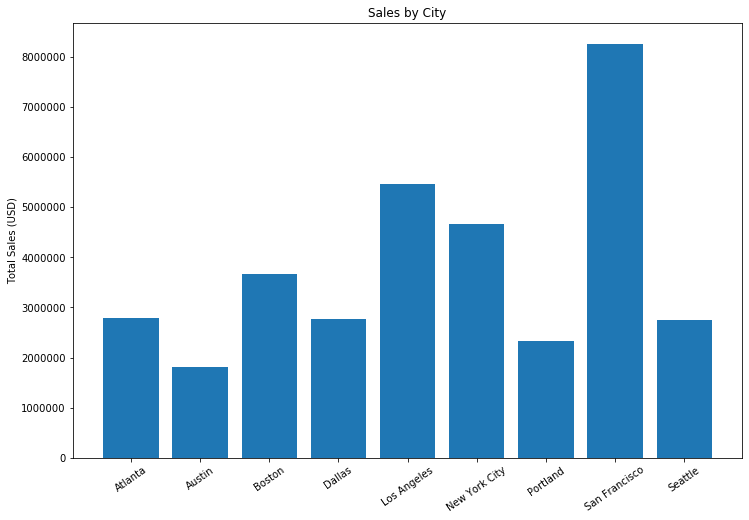

In [150]:
plt.figure(figsize=(12, 8))

x = city_sales.index
y = city_sales.values

plt.bar(x, y)

plt.ylabel('Total Sales (USD)')

plt.title('Sales by City')

plt.xticks(rotation=35)

plt.show()

In [151]:
# group sales by product and sum

product_sales = data['Sales'].groupby(data['Product']).sum()
product_sales

Product
20in Monitor                   454148.71
27in 4K Gaming Monitor        2435097.56
27in FHD Monitor              1132424.50
34in Ultrawide Monitor        2355558.01
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Apple Airpods Headphones      2349150.00
Bose SoundSport Headphones    1345565.43
Flatscreen TV                 1445700.00
Google Phone                  3319200.00
LG Dryer                       387600.00
LG Washing Machine             399600.00
Lightning Charging Cable       347094.15
Macbook Pro Laptop            8037600.00
ThinkPad Laptop               4129958.70
USB-C Charging Cable           286501.25
Vareebadd Phone                827200.00
Wired Headphones               246478.43
iPhone                        4794300.00
Name: Sales, dtype: float64

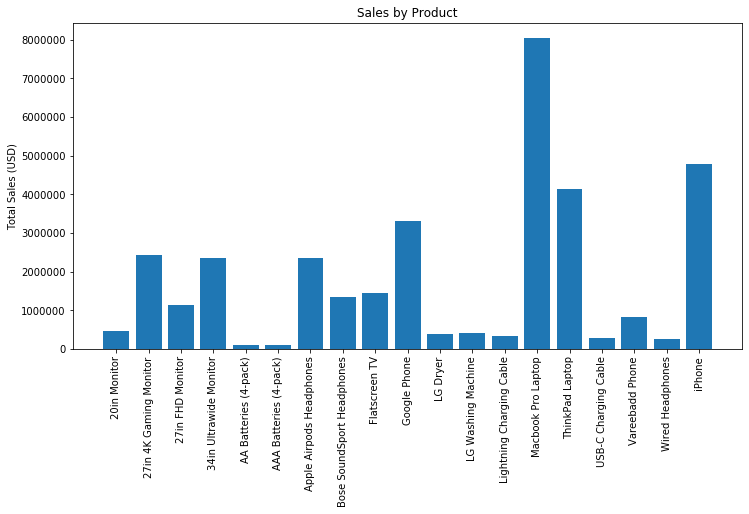

In [156]:
plt.figure(figsize=(12, 6))

x = product_sales.index
y = product_sales.values

plt.bar(x, y)

plt.ylabel('Total Sales (USD)')

plt.title('Sales by Product')

plt.xticks(rotation=90)

plt.show()

In [166]:
# group quantity ordered by product and sum

product_q = data['Quantity Ordered'].groupby(data['Product']).sum()
product_q

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

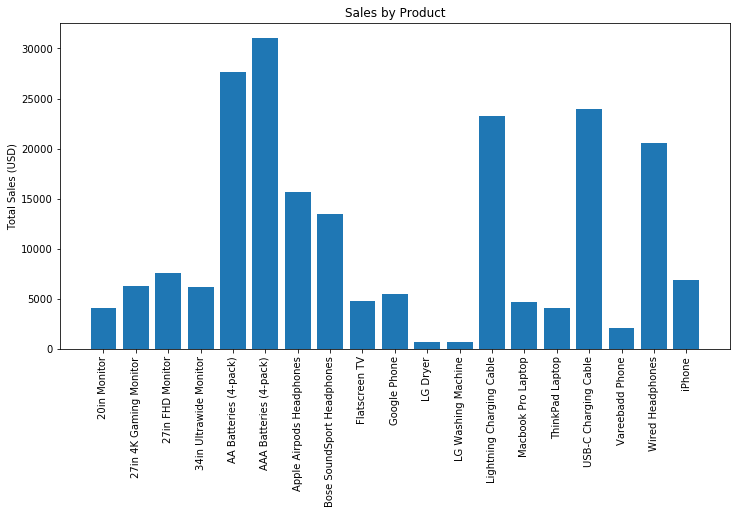

In [167]:
plt.figure(figsize=(12, 6))

x = product_q.index
y = product_q.values

plt.bar(x, y)

plt.ylabel('Total Sales (USD)')

plt.title('Sales by Product')

plt.xticks(rotation=90)

plt.show()

In [172]:
# check number of unique order IDs

data['Order ID'].nunique()

178437

In [183]:
# create new dataframe containing only rows which are duplicated in order ID

data_dup = data[data['Order ID'].duplicated(keep=False)]

In [187]:
# create list of items that were bought together

pairs = []

for ID, group in data_dup.groupby('Order ID'):

    pair = tuple(group['Product'].values)
    
    pairs.append(pair)
    


In [188]:
pairs[:10]

[('USB-C Charging Cable', 'Wired Headphones'),
 ('Apple Airpods Headphones', 'AA Batteries (4-pack)'),
 ('Vareebadd Phone', 'Wired Headphones'),
 ('Google Phone', 'USB-C Charging Cable'),
 ('Google Phone', 'Bose SoundSport Headphones'),
 ('iPhone', 'Apple Airpods Headphones'),
 ('Google Phone', 'Apple Airpods Headphones'),
 ('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'),
 ('USB-C Charging Cable', 'Apple Airpods Headphones'),
 ('Lightning Charging Cable', 'Wired Headphones')]

In [189]:
from collections import Counter

In [191]:
# find most common items bought together

Counter(pairs).most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 882),
 (('Google Phone', 'USB-C Charging Cable'), 856),
 (('iPhone', 'Wired Headphones'), 361),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 312),
 (('Google Phone', 'Wired Headphones'), 303),
 (('iPhone', 'Apple Airpods Headphones'), 286),
 (('Google Phone', 'Bose SoundSport Headphones'), 161),
 (('Vareebadd Phone', 'Wired Headphones'), 104),
 (('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 77),
 (('Vareebadd Phone', 'Bose SoundSport Headphones'), 60)]